In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from umap import UMAP

In [2]:
df = pd.read_csv("house_price.csv")

In [3]:
df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [4]:
df.tail(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
df.shape

(21613, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df.drop(["id", "date", "zipcode", "condition", "lat", "long"], axis= 1, inplace= True)

In [9]:
df.shape

(21613, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  sqft_living15  21613 non-null  int64  
 14  sqft_lot15     21613 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 2.5 MB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0,321950.00,450000.00,645000.0,7700000.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5
waterfront,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.0,1.0
view,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.0,4.0
grade,21613.0,7.656873,1.175459,1.0,7.00,7.00,8.0,13.0
sqft_above,21613.0,1788.390691,828.090978,290.0,1190.00,1560.00,2210.0,9410.0


In [12]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.667434,0.605567,0.323816,0.054012,0.126434,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.356967,0.477600,0.303093,0.154178,0.018841,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,0.664983,0.685342,0.283770,0.506019,0.050739,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,0.762704,0.876597,0.435043,0.318049,0.055363,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,0.113621,0.183512,0.015286,0.053080,0.007644,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,0.458183,0.523885,-0.245705,0.489319,0.006338,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.082775,0.072075,0.080588,-0.026161,0.092885,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.251321,0.167649,0.276947,-0.053440,0.103917,0.280439,0.072575
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,1.000000,0.755923,0.168392,0.446963,0.014414,0.713202,0.119248
sqft_above,0.605567,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,0.755923,1.000000,-0.051943,0.423898,0.023285,0.731870,0.194050


<Axes: >

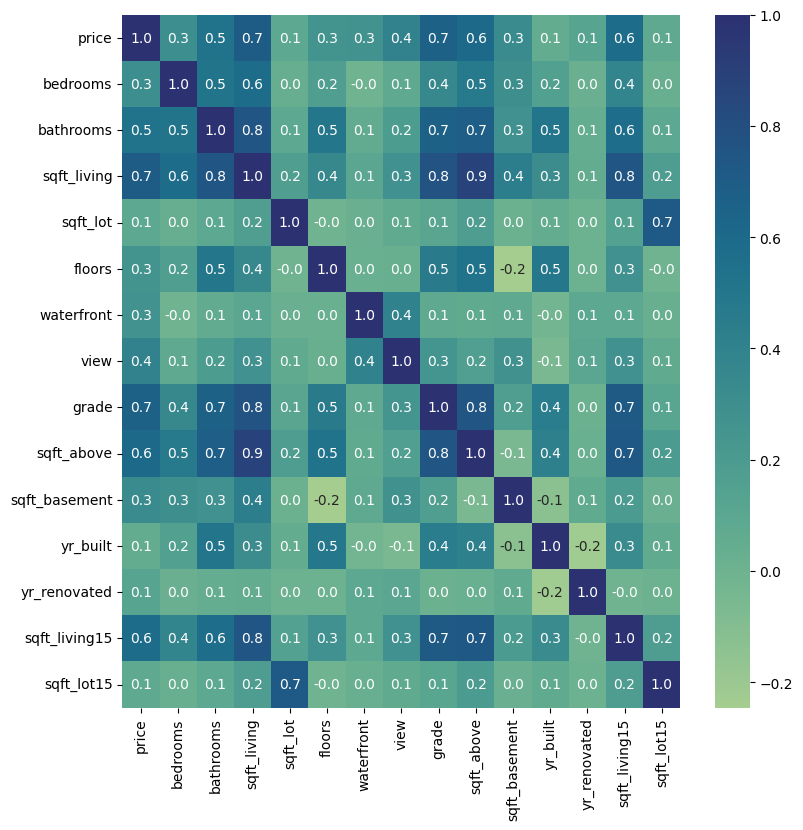

In [14]:
plt.figure(figsize= (9, 9))
sns.heatmap(df.corr(), cmap= "crest", annot= True, fmt= ".1f")

In [15]:
rbs = RobustScaler()

In [16]:
df = pd.DataFrame(rbs.fit_transform(df), columns= df.columns)

In [17]:
dbscan = DBSCAN(eps= 1.5, min_samples= 75)

In [18]:
dbscan.fit(df)

DBSCAN(eps=1.5, min_samples=75)

In [19]:
dbscan.labels_

array([ 0, -1,  0, ...,  0,  0,  0], dtype=int64)

In [20]:
pd.Series(dbscan.labels_).unique()

array([ 0, -1], dtype=int64)

In [21]:
pca = PCA(n_components= 5)

In [22]:
pca_df = pca.fit_transform(df)

<Axes: >

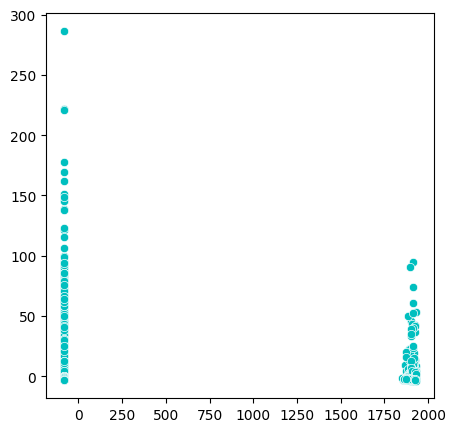

In [23]:
plt.figure(figsize= (5, 5))
sns.scatterplot(x= pca_df[:, 0], y= pca_df[:, 1], color= "c")

In [24]:
umap = UMAP(random_state= 75)
embedding = umap.fit_transform(df)

C:\Users\Hediye\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Axes: >

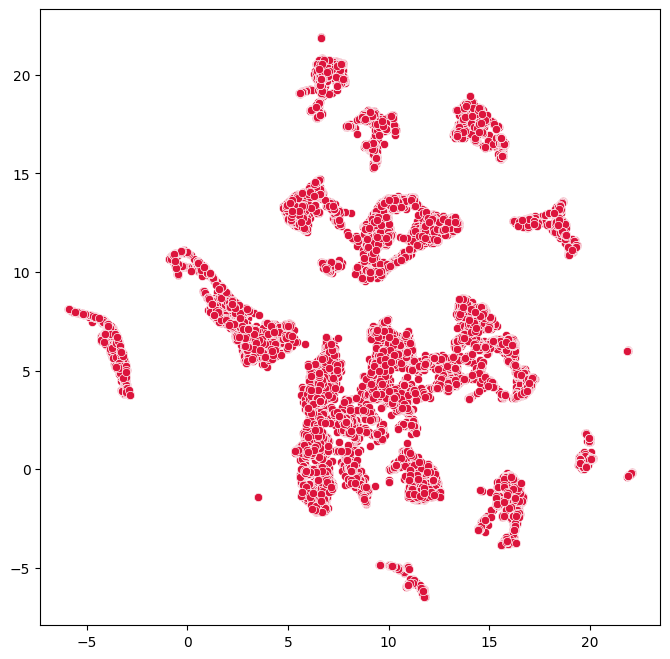

In [25]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x= embedding[:,0], y=embedding[:,1], color="crimson")

<Axes: >

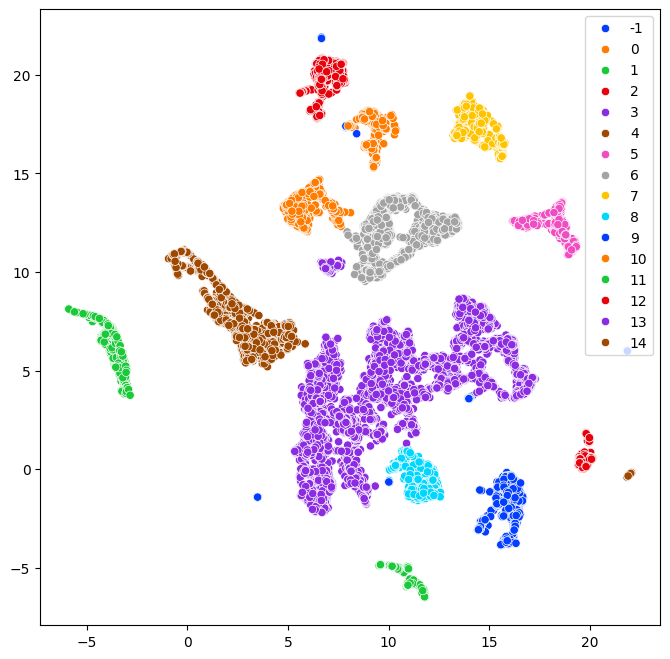

In [26]:
dbscan = DBSCAN(0.6, min_samples= 55).fit(embedding)

plt.figure(figsize=(8, 8))
sns.scatterplot(x= embedding[:, 0], y= embedding[:, 1], hue= dbscan.labels_, palette= "bright")

In [27]:
cluster_labels = pd.Series(dbscan.labels_)
cluster_labels.value_counts()

 3     8665
 6     2703
 4     1699
 8     1070
 9     1059
 7     1030
 0     1013
 1      914
 2      905
 5      805
 10     747
 11     360
 12     288
 13     214
-1       85
 14      56
Name: count, dtype: int64